dict_values(['625', '605'])

C:\Users\User\AppData\Local\Temp\ipykernel_17536\3953330892.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = mpl_cm.get_cmap('RdYlGn')


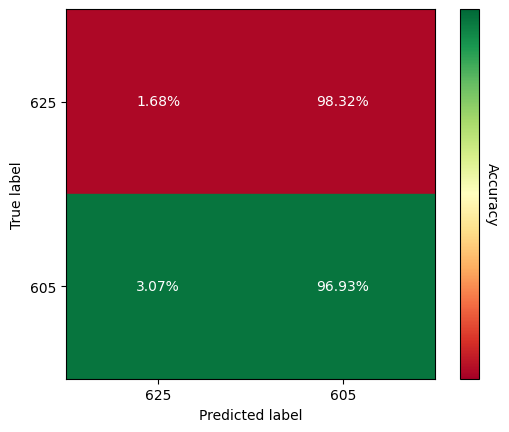

In [19]:
import numpy as np
from sklearn import metrics
from matplotlib import cm as mpl_cm
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize


CLASS_MAPPING = {1: '625', 0: '605'}
display(CLASS_MAPPING.values())
cm = np.load(r'D:\CZI_scope\code\confusion_matrix_bce.npy')
# Convert cm to percentage
cm = cm / cm.sum(axis=1)[:, None]
cm *= 100
# Create the confusion matrix display
# Create the confusion matrix display
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=list(CLASS_MAPPING.values()))
disp.plot(cmap='RdYlGn', values_format=".2f")

# Get the colormap
color_map = mpl_cm.get_cmap('RdYlGn')

# Normalize the values for color mapping
norm = Normalize(vmin=0, vmax=100)

def get_luminance(color):
    r, g, b, a = color
    return 0.299 * r + 0.587 * g + 0.114 * b

# Reverse the colormap for off-diagonal elements
def get_color(value, reverse=False):
    if reverse:
        value = 1 - norm(value)
    else:
        value = norm(value)
    return color_map(value)
for txt in disp.text_.ravel():
    txt.set_text('')
    
# Apply the custom colormap
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = get_color(cm[i, j], reverse=(i != j))
        # Set the background color for the confusion matrix cell
        disp.ax_.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, color=color))
        if get_luminance(color) > 0.5:
            text_color = 'black'
        else:
            text_color = 'white'
        # Add the text label
        disp.ax_.text(j, i, f'{cm[i, j]:.2f}%', ha='center', va='center', color=text_color)
        
        
# Ensure the color mapping is correctly shown on the plot
disp.im_.set_data(disp.im_.get_array().data)
disp.im_.set_clim(0, 100)  # Set the color limits to match the percentage scale

# Customize the colorbar
colorbar = disp.im_.colorbar
colorbar.set_ticks([])
colorbar.set_ticklabels([])
colorbar.ax.set_ylabel('Accuracy', rotation=270, labelpad=15)

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_17536\1272948236.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=True, color=color, edgecolor='black'))


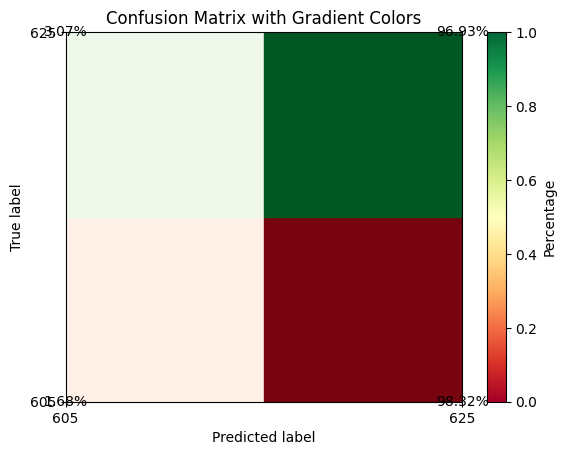

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# CLASS_MAPPING = {1: '625', 0: '605'}
CLASS_MAPPING = {0: '605', 1: '625'}

# Load and normalize the confusion matrix
cm = np.load(r'D:\CZI_scope\code\confusion_matrix_bce.npy')
cm = cm.astype(float)  # Ensure cm is float for proper normalization

# Convert cm to percentage
cm = cm / cm.sum(axis=1, keepdims=True)
cm *= 100

# Create a custom colormap
def get_colormap(value, high_is_good):
    if high_is_good:
        if value < 0.5:
            return plt.cm.Reds(value * 2)  # Red for incorrect predictions
        else:
            return plt.cm.Greens(value * 2 - 1)  # Green for correct predictions
    else:
        if value < 0.5:
            return plt.cm.Greens(value * 2)  # Green for correct predictions
        else:
            return plt.cm.Reds(value * 2 - 1)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix with custom colors
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        value = cm[i, j] / 100  # Normalize to [0, 1]
        if i == j:
            # The diagonal represents correct predictions 
            color = get_colormap(value, high_is_good=True)
        else:
            color = get_colormap(value, high_is_good=False)
        ax.text(j, i, f'{cm[i, j]:.2f}%', ha='center', va='center', color='black')
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=True, color=color, edgecolor='black'))

# Set axis labels
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_xticks(np.arange(len(CLASS_MAPPING)))
ax.set_yticks(np.arange(len(CLASS_MAPPING)))
ax.set_xticklabels(CLASS_MAPPING.values())
ax.set_yticklabels(CLASS_MAPPING.values())

# Set title and display
ax.set_title('Confusion Matrix with Gradient Colors')
plt.colorbar(plt.cm.ScalarMappable(cmap='RdYlGn'), ax=ax, orientation='vertical', label='Percentage')

plt.show()
